# Exploratory Data Analysis
### Introduction

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. In this notebook, I have found some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words
### Analysis

In [11]:
# Reading the document term matric created in cleaning notebook
import pandas as pd

data = pd.read_pickle('pickle files/cv.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
00,0,0,9,0,0,0,1,0,1,1,10,0
000,1,0,0,0,3,3,7,6,2,0,1,4
01,0,0,0,0,0,1,0,0,0,0,0,0
05,0,0,1,0,0,0,0,0,0,0,0,0
07,0,0,1,0,0,0,0,0,0,0,0,0


In [12]:
# finding the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending = False).head(30)
    top_dict[c] = list(zip(top.index, top.values))
    
top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 68),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('gotta', 21),
  ('wanna', 21),
  ('oh', 21),
  ('husband', 20),
  ('time', 20),
  ('got', 19),
  ('right', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 16),
  ('pregnant', 15),
  ('half', 14),
  ('asian', 14),
  ('hes', 14),
  ('need', 14),
  ('god', 14),
  ('yeah', 13),
  ('tell', 13)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('anthony', 27),
  ('say', 26),
  ('just', 26),
  ('day', 26),
  ('guys', 23),
  ('people', 22),
  ('youre', 19),
  ('tell', 19),
  ('right', 18),
  ('grandma', 18),
  ('think', 18),
  ('time', 18),
  ('thing', 17),
  ('yeah', 17),
  ('school', 16),
  ('good', 16),
  ('jokes', 16),
  ('did', 16),
  ('gonna', 15),
  ('baby', 15),
  ('okay', 15),
  ('ive', 15)],
 '

In [14]:
# printing top 15 words said by each comedian for deeper analysis
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('----')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, gotta, wanna, oh
----
anthony
im, like, know, dont, joke, got, said, thats, anthony, say, just, day, guys, people
----
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
----
bo
voice, know, guy, like, bro, love, girl, think, im, just, bo, stuff, robotic, repeat
----
dave
like, know, ah, said, just, im, shit, people, didnt, dont, time, thats, fuck, fucking
----
hasan
like, im, know, dont, dad, youre, just, laughter, going, thats, want, got, love, hasan
----
jim
like, im, dont, right, fucking, know, went, just, youre, people, thats, oh, day, going
----
joe
like, people, just, dont, fucking, im, fuck, thats, gonna, theyre, know, youre, think, shit
----
john
like, know, just, dont, said, clinton, old, im, thats, right, youre, little, time, hey
----
louis
like, just, know, dont, thats, im, youre, life, people, thing, hes, gonna, theres, cause
----
mike
like, im, know, said, just, do

By this, one quick analysis says that these comedians say the word 'like', 'just' and 'dont' the most.

However some of these can be added to stop word list.

In [23]:
# adding most common top words to stop word list
from collections import Counter

# getting top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    words += top
        
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'wanna',
 'oh',
 'husband',
 'time',
 'got',
 'right',
 'cause',
 'day',
 'women',
 'people',
 'pregnant',
 'half',
 'asian',
 'hes',
 'need',
 'god',
 'yeah',
 'tell',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'anthony',
 'say',
 'just',
 'day',
 'guys',
 'people',
 'youre',
 'tell',
 'right',
 'grandma',
 'think',
 'time',
 'thing',
 'yeah',
 'school',
 'good',
 'jokes',
 'did',
 'gonna',
 'baby',
 'okay',
 'ive',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'fuck',
 'think',
 'want',
 'people',
 'hes',
 'did',
 'guy',
 'old',
 'didnt',
 'make',
 'come',
 'going',
 'thing',
 'theyre',
 'let',
 'theres',
 'voice',
 'know',
 'guy',
 'like',
 'bro',
 'love',
 'girl',
 'think',
 'im',
 'just',
 'bo',
 'stuff',
 'robotic',
 'repeat',
 'dont',
 'yeah',
 'want',
 'laughte

In [21]:
# now aggregating this list to find the most common words
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 10),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('day', 5),
 ('hes', 5),
 ('thing', 5),
 ('fuck', 5),
 ('didnt', 5),
 ('going', 5),
 ('theyre', 5),
 ('theres', 5),
 ('good', 4),
 ('did', 4),
 ('want', 4),
 ('old', 4),
 ('really', 4),
 ('guys', 3),
 ('ive', 3),
 ('guy', 3),
 ('make', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('dude', 2),
 ('come', 2),
 ('love', 2),
 ('laughter', 2),
 ('applause', 2),
 ('man', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('little', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('half', 1),
 ('asian', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1)

In [22]:
# now if more than half of the comedians have used a word in top words
# then send it to stop words list

add_stop_words = [word for word,count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'time',
 'gonna',
 'think',
 'yeah',
 'said']

In [25]:
# necessary imports
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# reading clean data
data_clean = pd.read_pickle('pickle files/clean.pkl')

# adding new stop words to the default stop word list
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# recreating document-term matrix
cv = CountVectorizer(stop_words = stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_stop.index = data_clean.index

In [26]:
# pickling for later use
import pickle
pickle.dump(cv, open("pickle files/cv_stop.pkl", "wb"))
data_stop.to_pickle("pickle files/dtm_stop.pkl")

In [30]:
# making wordclouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords = stop_words, background_color = "white",
               colormap = "Dark2", max_font_size = 150, random_state = 42)

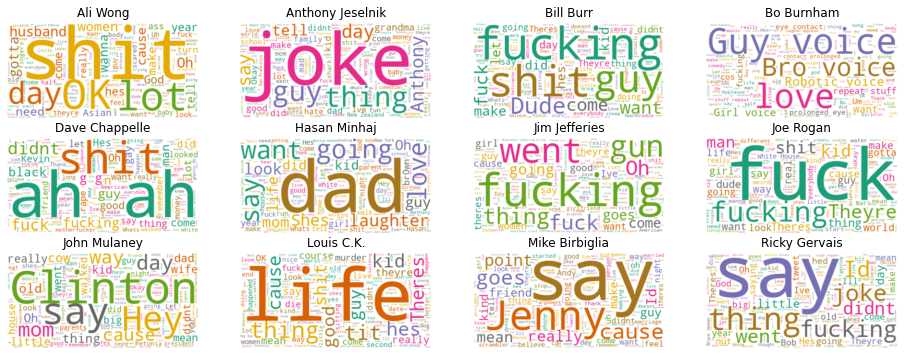

In [32]:
# reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation= "bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

**From the above wordclouds, I can quickly analyse that:**
1. Ali Wong uses the s-word a lot, she also says OK more than anyone else in competition and also talks about her husband. Haha funny!
2. A lot of other comedians use the F-word most frequently.

## Size of Vocabulary

### Analysis

In [46]:
# finding the number of unique words that each comedian uses

# identifying the non-zero items in the document-term matrix,
# meaning that the word occurs at least once

unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
    

# creating a new datafrome that contains this unique word count 
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns = ['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by = 'unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,1033
9,Louis C.K.,1165
3,Bo Burnham,1374
0,Ali Wong,1391
6,Jim Jefferies,1426
4,Dave Chappelle,1448
8,John Mulaney,1488
7,Joe Rogan,1527
10,Mike Birbiglia,1557
5,Hasan Minhaj,1680


In [53]:
# now calculating words per minute of each comedian

# first sinding total words a comedian uses during a routine
total_words = []
for comedian in data.columns:
    total = sum(data[comedian])
    total_words.append(total)
    
# comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# adding some relevent columns to our dataframe
data_words['total_words'] = total_words
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

data_wpm_sort = data_words.sort_values(by = 'words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,1033,3006,59,50.949153
0,Ali Wong,1391,3433,60,57.216667
9,Louis C.K.,1165,3469,58,59.810345
3,Bo Burnham,1374,3760,60,62.666667
4,Dave Chappelle,1448,4236,67,63.223881
10,Mike Birbiglia,1557,4893,76,64.381579
11,Ricky Gervais,1705,5111,79,64.696203
6,Jim Jefferies,1426,5070,77,65.844156
8,John Mulaney,1488,4188,62,67.548387
5,Hasan Minhaj,1680,5114,73,70.054795


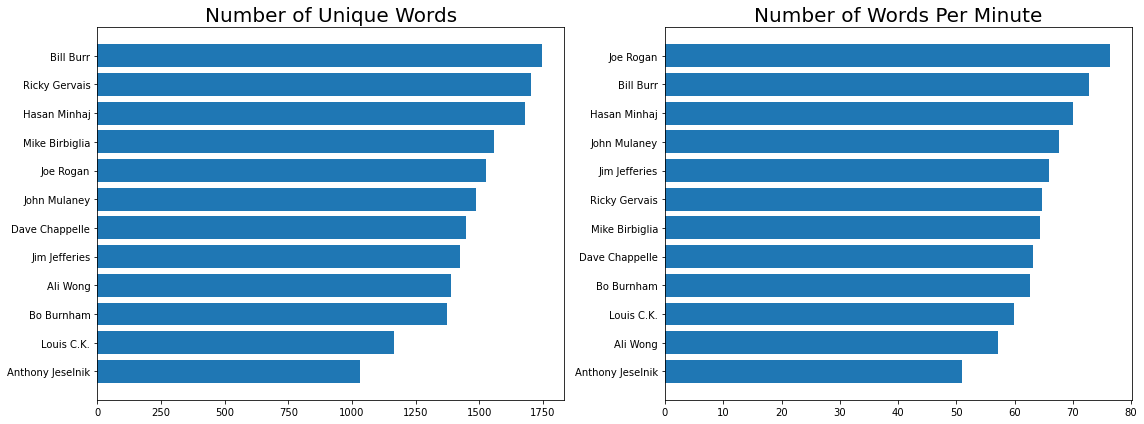

In [54]:
# plotting the results
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

**From the above plots, I can find that:**
1. Vocabulary
* Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
* Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary
2. Talking Speed
* Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
* Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow

Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity
### Analysis

In [55]:
# taking a look at the most common words again
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 10),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('day', 5),
 ('hes', 5),
 ('thing', 5),
 ('fuck', 5),
 ('didnt', 5),
 ('going', 5),
 ('theyre', 5),
 ('theres', 5),
 ('good', 4),
 ('did', 4),
 ('want', 4),
 ('old', 4),
 ('really', 4),
 ('guys', 3),
 ('ive', 3),
 ('guy', 3),
 ('make', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('dude', 2),
 ('come', 2),
 ('love', 2),
 ('laughter', 2),
 ('applause', 2),
 ('man', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('little', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('half', 1),
 ('asian', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1)

In [60]:
# isolating the bad words used
bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([bad_words.fucking + bad_words.fuck, bad_words.shit], axis = 1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,11
bill,108,64
bo,38,6
dave,65,46
hasan,24,15
jim,116,21
joe,135,40
john,4,6
louis,21,26


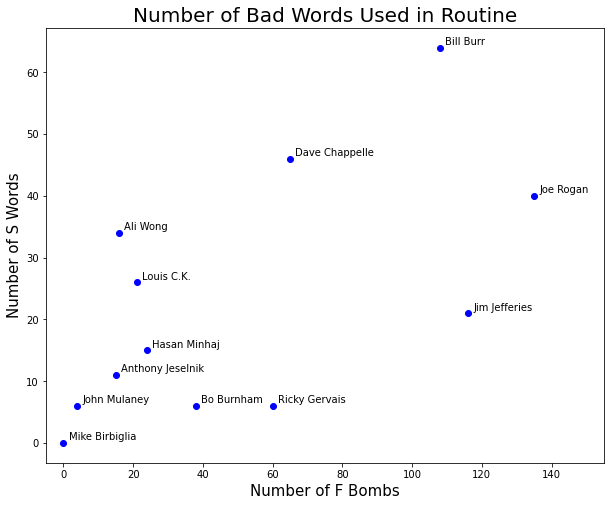

In [61]:
# creating a scatter plot of results
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

**From the above scatter plot, I can analyse that:**

* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - Clearly profanity has proved a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.